# Tiramisu

In [84]:
# coding: utf-8
# ## Dependencies
# In[1]:

import time
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms

from models import tiramisu
from datasets import camvid
from datasets import joint_transforms
import utils.imgs
import utils.training as train_utils
import datetime
from IPython.display import Image, display
import os

In [75]:
CAMVID_PATH = Path('./data/')
WEIGHTS_PATH = Path('.weights/')

WEIGHTS_PATH.mkdir(exist_ok=True)
batch_size=20
LR = 1e-4

### Load Model

In [76]:
normalize = transforms.Normalize(mean=camvid.mean, std=camvid.std)

test_dset = camvid.CamVid(
    CAMVID_PATH, 'test', joint_transform=None,
    transform=transforms.Compose([
        transforms.Resize([132, 132]),
        transforms.ToTensor(),
        normalize
    ]),
    target_transform=transforms.Compose([          
          camvid.LabelToLongTensor(),
    ]))
test_loader = torch.utils.data.DataLoader(test_dset, batch_size=batch_size, shuffle=False)
torch.cuda.manual_seed(0)

In [77]:
model = tiramisu.FCDenseNet67(n_classes=4).cuda()
model.apply(train_utils.weights_init)
optimizer = torch.optim.RMSprop(model.parameters(), lr=LR, weight_decay=1e-4)
criterion = nn.NLLLoss(weight=camvid.class_weight.cuda()).cuda()

In [78]:
train_utils.load_weights(model, str(WEIGHTS_PATH)+'/latest.th')
train_utils.test(model, test_loader, criterion, epoch=1)  

loading weights 'weights/weights-168-0.023-0.005.pth'


RuntimeError: weights/weights-168-0.023-0.005.pth is a zip archive (did you mean to use torch.jit.load()?)

### Compute segmentation for the images in "output folder"

In [85]:
train_utils.view_sample_predictions(model, test_loader, 0, n=10)

### Show the results

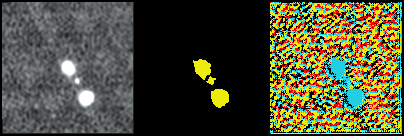

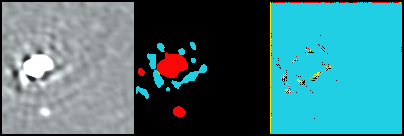

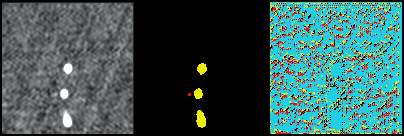

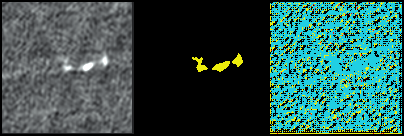

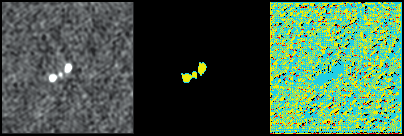

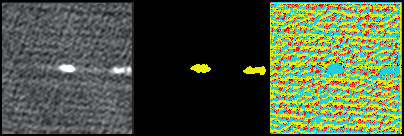

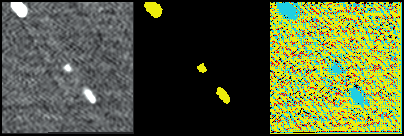

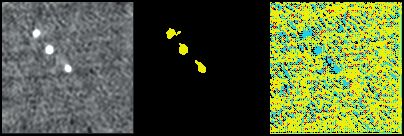

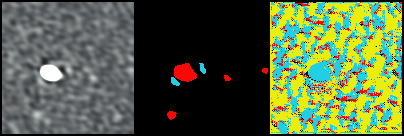

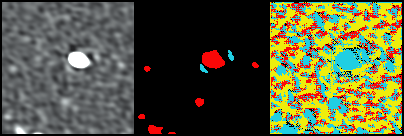

In [93]:

listOfImageNames = ["output/"+f for f in os.listdir('./output') if(".png" in f)]

for imageName in listOfImageNames:
    display(Image(filename=imageName))